In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
df <- read.csv(file = "fidget.spinner.csv", header=TRUE)
dput(df)

structure(list(bearing = structure(c(5L, 5L, 5L, 5L, 5L, 5L, 
2L, 2L, 2L, 2L, 2L, 2L, 4L, 4L, 4L, 4L, 4L, 4L, 7L, 7L, 7L, 7L, 
7L, 7L, 1L, 1L, 1L, 1L, 1L, 1L, 6L, 6L, 6L, 6L, 6L, 6L, 3L, 3L, 
3L, 3L, 3L, 3L, 5L, 5L, 5L, 5L, 5L, 5L, 2L, 2L, 2L, 2L, 2L, 2L, 
4L, 4L, 4L, 4L, 4L, 4L, 7L, 7L, 7L, 7L, 7L, 7L, 1L, 1L, 1L, 1L, 
1L, 1L, 6L, 6L, 6L, 6L, 6L, 6L, 3L, 3L, 3L, 3L, 3L, 3L), .Label = c("b", 
"c", "g", "h", "m", "m2", "r"), class = "factor"), top = c(1L, 
1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 
0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 
0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 
1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 
0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 1L, 1L, 
0L, 0L, 0L), time = c(151L, 140L, 134L, 136L, 125L, 131L, 47L, 
69L, 69L, 86L, 94L, 90L, 79L, 85L, 94L, 63L, 66L, 74L, 65L, 63L, 
61L, 71L, 73L, 72L, 66L, 67L, 72L, 56L, 50L, 58L, 18L, 29L, 33L, 
22L, 33L, 29L, 5L, 

In [4]:
df %>%
    group_by(spinner, bearing) %>%
    summarize(mean_spin_time = mean(time))

spinner,bearing,mean_spin_time
b,b,77.500000
b,c,55.833333
b,g,27.333333
b,h,96.333333
b,m,159.000000
b,m2,37.500000
b,r,76.333333
r,b,61.500000
r,c,75.833333
r,g,5.666667


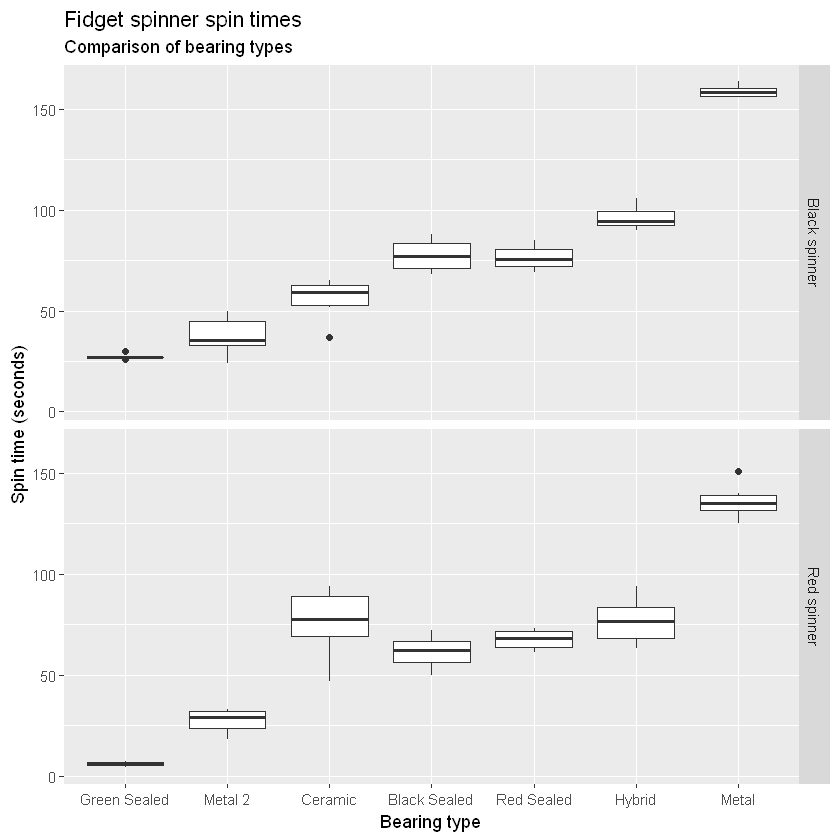

In [5]:
spinner.labels <- c(r = "Red spinner", b = "Black spinner")
ggplot(df, aes(reorder(bearing, time), time)) + 
    geom_boxplot() + 
    facet_grid(spinner~., labeller = labeller(spinner = spinner.labels)) +
    labs(x = "Bearing type", 
         y = "Spin time (seconds)", 
         title = "Fidget spinner spin times",
         subtitle = "Comparison of bearing types") + 
    scale_x_discrete(breaks=c("c", "m", "h", "r", "b", "m2", "g"), 
                     labels=c("Ceramic", "Metal", "Hybrid", "Red Sealed", "Black Sealed", "Metal 2", "Green Sealed")) +
    #geom_point(aes(colour=factor(top)), size=0.8) +
    theme(legend.position = "none")

In [83]:
ggsave("boxplot.png")

Saving 6.67 x 6.67 in image


No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


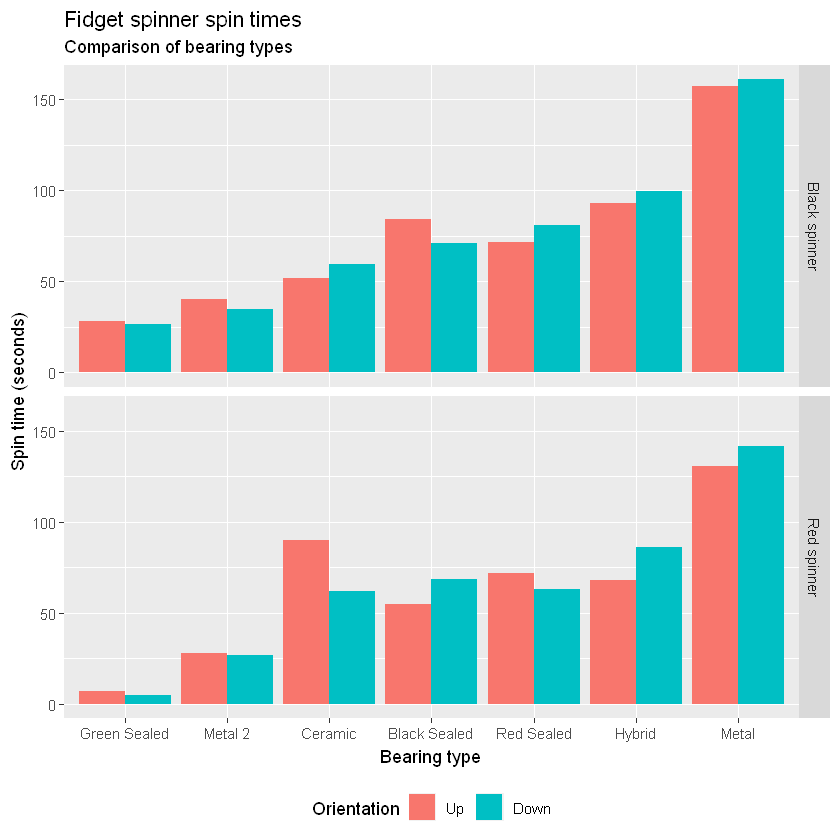

In [6]:
ggplot(df, aes(reorder(bearing, time), time, fill=factor(top))) + 
    geom_bar(position = "dodge", stat="summary") + 
    facet_grid(spinner~., labeller = labeller(spinner = spinner.labels)) +    scale_x_discrete(breaks=c("c", "m", "h", "r", "b", "m2", "g"), 
                     labels=c("Ceramic", "Metal", "Hybrid", "Red Sealed", "Black Sealed", "Metal 2", "Green Sealed")) +
    scale_fill_discrete(labels=c("Up", "Down")) +
    labs(x = "Bearing type",
         y = "Spin time (seconds)",
         fill = "Orientation", 
         title = "Fidget spinner spin times",
         subtitle = "Comparison of bearing types") + 
    theme(legend.position = "bottom")

In [85]:
ggsave("grouped.barplot.png")

Saving 6.67 x 6.67 in image
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


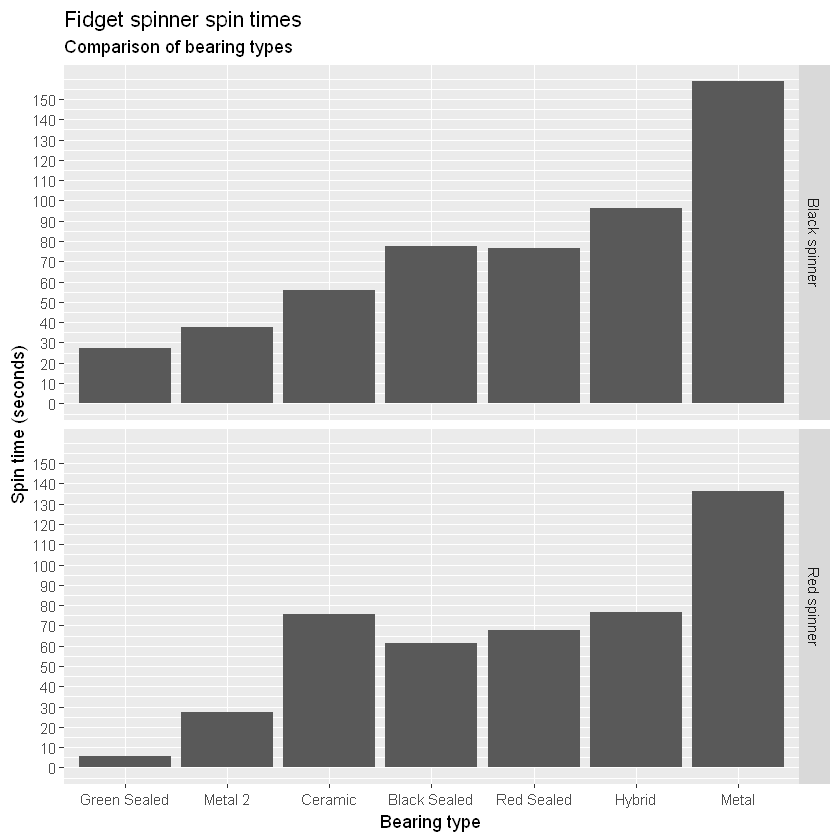

In [7]:
ggplot(df, aes(reorder(bearing, time), time)) + 
    geom_bar(stat="summary") + 
    facet_grid(spinner~., labeller = labeller(spinner = spinner.labels)) +
    scale_x_discrete(breaks=c("c", "m", "h", "r", "b", "m2", "g"), 
                     labels=c("Ceramic", "Metal", "Hybrid", "Red Sealed", "Black Sealed", "Metal 2", "Green Sealed")) +
    scale_y_continuous(breaks=seq(0, 150, 10)) +
    labs(x = "Bearing type",
         y = "Spin time (seconds)", 
         title = "Fidget spinner spin times",
         subtitle = "Comparison of bearing types")

In [87]:
ggsave("barplot.png")

Saving 6.67 x 6.67 in image
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


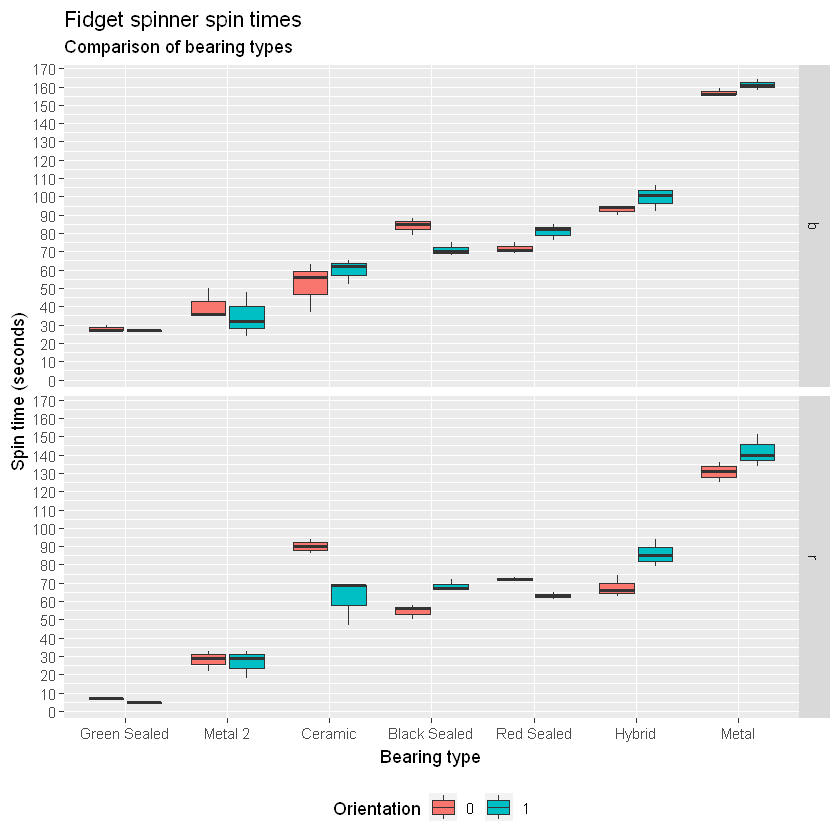

In [15]:
ggplot(df, aes(reorder(bearing, time), time, fill=factor(top))) + 
    geom_boxplot() + 
    labs(x = "Bearing type", 
         y = "Spin time (seconds)", 
         title = "Fidget spinner spin times",
         subtitle = "Comparison of bearing types",
         fill = "Orientation") +
    facet_grid(spinner~.) +
    scale_y_continuous(breaks=seq(0,175, 10)) +
    scale_x_discrete(breaks=c("c", "m", "h", "r", "b", "m2", "g"), 
                     labels=c("Ceramic", "Metal", "Hybrid", "Red Sealed", "Black Sealed", "Metal 2", "Green Sealed")) +
    #geom_point(aes(colour=factor(top)), size=0.8) +
    theme(legend.position = "bottom")

In [16]:
df.m <- df %>%
    filter(bearing == "c") %>%
    select(time, top)
df.m.1 <- df.m %>% 
    filter(top == 1) %>%
    select(time)
df.m.2 <- df.m %>%
    filter(top == 0) %>%
    select(time) 
wilcox.test(df.m.1$time, df.m.2$time)

Warning message in wilcox.test.default(df.m.1$time, df.m.2$time):
"cannot compute exact p-value with ties"


	Wilcoxon rank sum test with continuity correction

data:  df.m.1$time and df.m.2$time
W = 13, p-value = 0.4704
alternative hypothesis: true location shift is not equal to 0
